In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [4]:
tempMax = xr.open_dataset("/home/mlopez/EXEC/Données test/tasmax_day_BNU-ESM_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1956.nc")

In [5]:
tempMax

<xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 ...
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.

In [6]:
tempMax.variables

Frozen({'ts': <xarray.IndexVariable 'ts' (ts: 3)>
array([nan, nan, nan], dtype=float32), 'time': <xarray.IndexVariable 'time' (time: 365)>
array([cftime.DatetimeNoLeap(1956-01-01 00:00:00),
       cftime.DatetimeNoLeap(1956-01-02 00:00:00),
       cftime.DatetimeNoLeap(1956-01-03 00:00:00), ...,
       cftime.DatetimeNoLeap(1956-12-29 00:00:00),
       cftime.DatetimeNoLeap(1956-12-30 00:00:00),
       cftime.DatetimeNoLeap(1956-12-31 00:00:00)], dtype=object)
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time, 'time_vectors': <xarray.Variable (time: 365, ts: 3)>
array([[1956,    1,    1],
       [1956,    1,    2],
       [1956,    1,    3],
       ...,
       [1956,   12,   29],
       [1956,   12,   30],
       [1956,   12,   31]], dtype=int32), 'lat': <xarray.IndexVariable 'lat' (lat: 700)>
array([83.28931, 83.20598, 83.12265, ..., 25.2083 , 25.12497, 25.04164],
      dtype=float32)
Attributes:
    axis:           Y
    units:          degrees_north

In [7]:
tempMax.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 1956 1 1 1956 1 2 ... 1956 12 30 1956 12 31
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.>

In [8]:
tempMax.dims

Frozen(SortedKeysDict({'ts': 3, 'time': 365, 'lat': 700, 'lon': 1064}))

In [9]:
tempMax.coords

Coordinates:
  * ts       (ts) float32 nan nan nan
  * time     (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

In [10]:
tempMax.attrs

{'Conventions': 'CF-1.5',
 'title': 'BNU-ESM model output prepared for CMIP5 historical',
 'history': '2012-03-12T06:02:50Z CMOR rewrote data to comply with CF standards and CMIP5 requirements.\n2016-01-18T22:18:22: Interpolate to nrcan_livneh grid.\n2016-02-10T09:50:01: Bias correction using nrcan_livneh.',
 'institution': 'GCESS,BNU,Beijing,China',
 'source': 'BNU-ESM\n30-day moving window 50-bins quantile mapping with detrending.',
 'redistribution': 'Redistribution prohibited. For internal use only.'}

In [13]:
# Extract Temperature 
# Select nearest
# Drop NaN, convert to Celcius
da = tempMax.tasmax.sel(method='nearest').dropna(dim='time') - 273.15  # or .ffill(dim='time')

In [14]:
da

<xarray.DataArray 'tasmax' (time: 0, lat: 700, lon: 1064)>
array([], shape=(0, 700, 1064), dtype=float32)
Coordinates:
  * time     (time) object 
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

In [20]:
da1 = tempMax.tasmax.sel(time=slice('1956-01-01', '1956-12-31')) - 273.15 
da1

<xarray.DataArray 'tasmax' (time: 365, lat: 700, lon: 1064)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

(array([ 132810., 1084957., 2156506., 2421033., 3307833., 5179349.,
        5707928., 4803933., 2740673.,  280168.]),
 array([233.52336, 241.28162, 249.03986, 256.7981 , 264.55634, 272.3146 ,
        280.07285, 287.8311 , 295.58936, 303.3476 , 311.10583],
       dtype=float32),
 <a list of 10 Patch objects>)

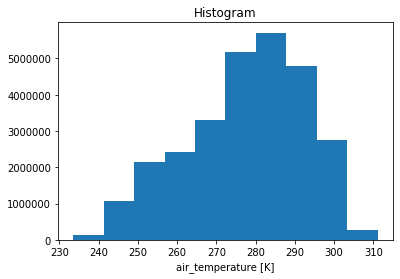

In [18]:
da1.plot()